In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
assembly_data = pd.read_csv('transposed_report.tsv', sep='\t')

In [3]:
assembly_data['k'] = assembly_data['Assembly'].apply(lambda x: x.split('_')[0][1:])

In [4]:
assembly_data['coverage'] = assembly_data['Assembly'].apply(lambda x: x.split('_')[2][:len(x.split('_')[2])-1])

In [5]:
assembly_data['fragment_length'] = assembly_data['Assembly'].apply(lambda x: 600 if '600m' in x else 200)

In [6]:
reads = assembly_data['Assembly'].apply(lambda x: x.strip('-contigs'))

In [7]:
assembly_data.index = pd.DataFrame(index=reads).index

# gather all ntcard data

In [8]:
ntcard_data = pd.read_csv('ntcard_summary.tsv', sep='\t', index_col=0)

In [9]:
all_data = pd.concat([assembly_data, ntcard_data], axis=1)

In [10]:
# Estimate genome size
all_data['F0-f1'] = all_data['F0'] - all_data['f1']
# Define sample nums
all_data['Sample Num'] = all_data['Assembly'].apply(
    lambda x: x.strip('-contigs').split('_')[len(x.strip('-contigs').split('_'))-1])
all_data['Sample Num'] = pd.to_numeric(all_data['Sample Num'])

In [11]:
# Define good assemblie

In [12]:
all_data['Reads'] = all_data['Assembly'].apply(lambda name: name[4:].strip('-contigs'))


In [13]:
thresholds = all_data[['Reads', 'NGA50']].groupby('Reads').agg(
    lambda x: np.percentile(x, 90)).rename(columns={'NGA50': 'threshold'})

In [14]:
all_data = all_data.join(thresholds, on='Reads')
all_data['Good Quality'] = all_data['NGA50'] > all_data['threshold']

In [15]:
all_data

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,f296,f297,f298,f299,f300,F0-f1,Sample Num,Reads,threshold,Good Quality
Assembly,,,,,,,,,,,,,,,,,,,,,
k30_ecoli_100X_1,k30_ecoli_100X_1-contigs,574,149,111,96,57,27,4600795,4559642,4456040,...,63,63,0,64,0,5904690,1,ecoli_100X_1,122963.7,False
k36_ecoli_100X_1,k36_ecoli_100X_1-contigs,435,129,101,83,54,32,4607285,4569436,4494389,...,0,0,0,0,0,5918643,1,ecoli_100X_1,122963.7,False
k42_ecoli_100X_1,k42_ecoli_100X_1-contigs,376,119,91,81,57,31,4617624,4586981,4510894,...,0,0,0,0,0,5929916,1,ecoli_100X_1,122963.7,False
k48_ecoli_100X_1,k48_ecoli_100X_1-contigs,339,109,88,77,54,30,4621162,4591434,4533092,...,0,128,0,0,128,5820887,1,ecoli_100X_1,122963.7,False
k54_ecoli_100X_1,k54_ecoli_100X_1-contigs,295,103,85,74,53,32,4623081,4595244,4546923,...,0,0,0,0,0,5772871,1,ecoli_100X_1,122963.7,False
k60_ecoli_100X_1,k60_ecoli_100X_1-contigs,284,98,80,69,51,32,4628369,4599433,4550881,...,0,192,63,0,0,5700618,1,ecoli_100X_1,122963.7,False
k66_ecoli_100X_1,k66_ecoli_100X_1-contigs,264,97,78,68,51,32,4628447,4599865,4547044,...,0,192,127,128,63,5644006,1,ecoli_100X_1,122963.7,False
k72_ecoli_100X_1,k72_ecoli_100X_1-contigs,257,92,74,64,50,31,4634937,4604631,4551776,...,128,0,128,0,128,5644498,1,ecoli_100X_1,122963.7,False
k78_ecoli_100X_1,k78_ecoli_100X_1-contigs,242,90,74,65,51,32,4634528,4604129,4556604,...,0,64,0,0,64,5586014,1,ecoli_100X_1,122963.7,False


# Machine learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [17]:
partial_data = all_data #all_data[(all_data['fragment_length'] == 600)] #& (all_data['coverage'] == '200')]
X = pd.concat([partial_data.loc[:, 'F1':'f300'], partial_data[['F0-f1', 'coverage']]], axis=1)
y = partial_data['Good Quality']

In [18]:
# X = partial_data[['F0', 'F1', 'f1', 'F0-f1', 'coverage']]
X

,F1,F0,f1,f2,f3,f4,f5,f6,f7,f8,...,f293,f294,f295,f296,f297,f298,f299,f300,F0-f1,coverage
Assembly,,,,,,,,,,,,,,,,,,,,,
k30_ecoli_100X_1,374422400,38826753,32922063,1285348,47870,3449,310,127,63,0,...,64,63,63,63,63,0,64,0,5904690,100
k36_ecoli_100X_1,355856000,42939248,37020605,1309849,46680,3118,117,63,0,0,...,0,0,0,0,0,0,0,0,5918643,100
k42_ecoli_100X_1,337289600,46391604,40461688,1319944,41710,2221,119,63,0,0,...,0,0,0,0,0,0,0,0,5929916,100
k48_ecoli_100X_1,318723200,49023093,43202206,1265921,33804,1918,249,0,0,0,...,0,192,0,0,128,0,0,128,5820887,100
k54_ecoli_100X_1,300156800,51068467,45295596,1182182,31044,1734,185,63,0,0,...,0,64,64,0,0,0,0,0,5772871,100
k60_ecoli_100X_1,281590400,52329536,46628918,1112007,26903,1555,250,0,0,0,...,0,0,0,0,192,63,0,0,5700618,100
k66_ecoli_100X_1,263024000,53331717,47687711,1047923,26047,1047,4,0,0,0,...,0,128,0,0,192,127,128,63,5644006,100
k72_ecoli_100X_1,244457600,53200559,47556061,1016694,26206,1177,59,63,0,0,...,63,63,64,128,0,128,0,128,5644498,100
k78_ecoli_100X_1,225891200,52874883,47288869,990191,21866,870,3,64,0,0,...,0,0,0,0,64,0,0,64,5586014,100


In [19]:
split = 3
X_train = X.loc[partial_data[partial_data['Sample Num'] > split].index.values, 'F1':'coverage']
X_test = X.loc[partial_data[partial_data['Sample Num'] <= split].index.values, 'F1':'coverage']
y_train = partial_data['Good Quality'][partial_data['Sample Num'] > split]
y_test = partial_data['Good Quality'][partial_data['Sample Num'] <= split]


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)


Logistic regression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
log_reg.score(X_test, y_test)

In [ ]:
len(y[y])/len(y)

In [ ]:
y_test[log_reg.predict(X_test)]

Lasso and ElasticNet regression

In [ ]:
#y = partial_data['NGA50']

In [20]:
y_train = partial_data['NGA50'][partial_data['Sample Num'] > split]
y_test = partial_data['NGA50'][partial_data['Sample Num'] <= split]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
lasso_model.fit(X_train, y_train)

In [ ]:
lasso_model.score(X_test, y_test)

In [ ]:
elastic_model = ElasticNet(alpha=0.01)

In [ ]:
elastic_model.fit(X_train, y_train)

In [ ]:
elastic_model.score(X_test, y_test)

Random Forest Regression

In [21]:
rfr_model = RandomForestRegressor(n_estimators=100, n_jobs=32)#, max_features='log2')

In [22]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=32, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
rfr_model.score(X_test, y_test)

0.9085272495538983

In [24]:
gfr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')

In [ ]:
gfr_model.fit(X_train, y_train)

In [ ]:
gfr_model.score(X_test, y_test)

In [25]:
import matplotlib.pyplot as plt

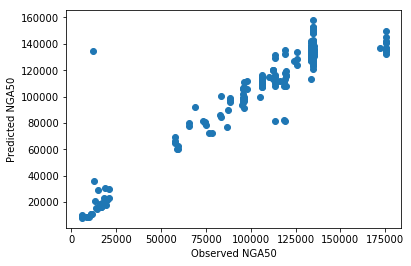

In [26]:
plt.scatter(y_test, rfr_model.predict(X_test))
plt.xlabel('Observed NGA50')
plt.ylabel('Predicted NGA50')
plt.show()

In [30]:
predicted = rfr_model.predict(X_test)
#predicted_good = rfr_model.predict(X_test)[rfr_model.predict(X_test) > partial_data.loc[X_test.index, 'threshold']]
predicted_arggood = rfr_model.predict(X_test) > partial_data.loc[X_test.index.values, 'threshold']

In [31]:
results = pd.DataFrame({"Assembly" : X_test.index}, index=X_test.index)

In [32]:
results['Reads'] = pd.Series(results['Assembly']).apply(lambda name: name[4:])
results['k'] = pd.Series(results['Assembly']).apply(lambda name: name[1:3])

In [33]:
observed = y_test
observed_arggood = y_test > partial_data.loc[y_test.index.values, 'threshold']

In [34]:
results['Predicted NGA50'] = rfr_model.predict(X_test)
results['Observed NGA50'] = y_test

In [35]:
predicted_thresholds = results[['Reads', 'Predicted NGA50']].groupby('Reads').agg(
    lambda x: np.percentile(x, 90)).rename(columns={'Predicted NGA50': 'Predicted Threshold'})
observed_thresholds = results[['Reads', 'Observed NGA50']].groupby('Reads').agg(
    lambda x: np.percentile(x, 90)).rename(columns={'Observed NGA50': 'Observed Threshold'})

In [36]:
results = results.join(predicted_thresholds, on='Reads')
results = results.join(observed_thresholds, on='Reads')
results['Predicted Good Quality'] = results['Predicted NGA50'] > results['Predicted Threshold']
results['Observed Good Quality']= results['Observed NGA50'] > results['Observed Threshold']

In [37]:
results[['Reads', 'k', 'Predicted Good Quality', 'Observed Good Quality']][results['Predicted Good Quality'] | results['Observed Good Quality']]

,Reads,k,Predicted Good Quality,Observed Good Quality
Assembly,,,,
k90_ecoli_100X_1,ecoli_100X_1,90,True,True
k96_ecoli_100X_1,ecoli_100X_1,96,True,True
k90_ecoli_100X_2,ecoli_100X_2,90,True,True
k96_ecoli_100X_2,ecoli_100X_2,96,True,True
k90_ecoli_100X_3,ecoli_100X_3,90,True,True
k96_ecoli_100X_3,ecoli_100X_3,96,True,True
k42_ecoli_100X_600m_1,ecoli_100X_600m_1,42,False,True
k84_ecoli_100X_600m_1,ecoli_100X_600m_1,84,True,False
k90_ecoli_100X_600m_1,ecoli_100X_600m_1,90,True,False


In [ ]:
y_pos = np.arange(len(rfr_model.feature_importances_))
plt.scatter(y_pos, rfr_model.feature_importances_)
#plt.bar(y_pos, rfr_model.feature_importances_, align='center', alpha=0.5, tick_label=X.columns.values)
plt.show()

In [ ]:
len(X.columns.values)

In [ ]:
rfr_model.feature_importances_[rfr_model.feature_importances_ >0.05]

In [ ]:
X.columns.values[rfr_model.feature_importances_ >0.02]

Support Vector Regression and Ridge Regression

In [ ]:
from sklearn.kernel_approximation import Nystroem

In [ ]:
#svr_nystroem_model = Pipeline(steps=[('Nystroem', Nystroem(kernel='linear')), ('svr', LinearSVR(C=1.0))])

In [ ]:
#svr_nystroem_model.fit(X_train, y_train)

In [ ]:
#svr_nystroem_model.score(X_test, y_test)

In [ ]:
#r2_score(svr_nystroem_model.predict(X_test), y_test)

In [ ]:
#plt.scatter(range(0,len(X_test)), svr_nystroem_model.predict(X_test))
#plt.scatter(range(0,len(X_test)), y_test)

#plt.show()

In [ ]:
svr_model = SVR(C=1.0, kernel='linear')

In [ ]:
svr_model.fit(X_train, y_train)

In [ ]:
svr_model.score(X_test, y_test)

In [27]:
ridge_model = Ridge(alpha=0.01)

In [28]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
ridge_model.score(X_test, y_test)

0.19759187998765571

In [ ]:
print "test"